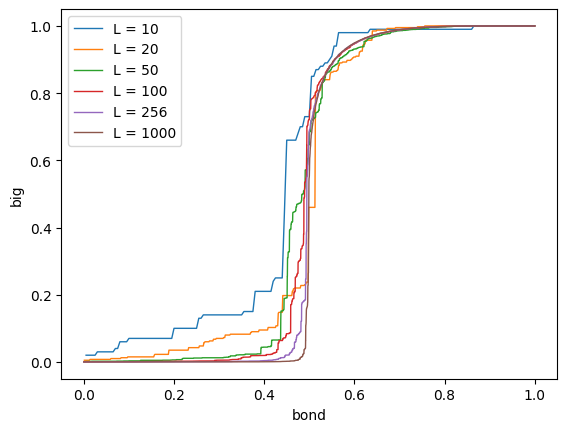

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# 격자의 bond percolation 문제를 해결하는 함수
def bond_percolation(L):
  N = L**2      # 격자의 총 노드 수
  edges = []    # 모든 가능한 bond를 저장할 리스트

  # 모든 노드에 대해 가능한 bond 추가
  for i in range(N):
    x, y = i%L, i//L
    if x<L-1:
      edges.append((i, i+1))  # 오른쪽
    if x==L-1:
      edges.append((i, i-L+1))# 마지막 열 노드들의 오른쪽 = 첫 번째 열 노드
    if y<L-1:
      edges.append((i, i+L))  # 아래
    if y==L-1:
      edges.append((i, i-(L-1)*L))# 마지막 행 노드들의 아래 = 첫 번쨰 행 노드

  num_edges = len(edges)    # 총 bond 수

  ptr = np.full(N, -1)  # 각 노드의 parent를 저장할 배열

  # 노드 i의 root를 찾는 함수
  def find(i):
    if ptr[i] < 0:
      return i
    else:
      ptr[i] = find(ptr[i])  # root를 parent로 지정
      return ptr[i]

  # 두 개의 트리를 합치는 함수
  def union(r1, r2, big):
    if r2 != r1:
      if ptr[r1] > ptr[r2]:   # 두 번째 트리가 더 크면
        ptr[r2] += ptr[r1]    # 첫 번째 트리를 병합
        ptr[r1] = r2
        r1 = r2
      else:                   # 아니면 반대로
        ptr[r1] += ptr[r2]
        ptr[r2] = r1
      if -ptr[r1] > big:      # 기존의 big보다 크면 갱신
        big = -ptr[r1]
    return r1, r2, big

  # bond 추가 순서를 무작위로 결정
  order = np.arange(num_edges)
  random.shuffle(order)

  big = 0
  bond_list = []
  big_list = []

  # 모든 bond를 하나씩 추가하며 클러스터 크기 계산
  for i in range(num_edges):
    s1, s2 = edges[order[i]]  # 위의 order를 따라 엣지 추가
    r1 = find(s1)
    r2 = find(s2)
    if r1 != r2:
      r1, r2, big = union(r1, r2, big)
    bond_list.append((i+1)/num_edges)   # 정규화된 bond 수 저장
    big_list.append(big/N)  # 정규화된 가장 큰 클러스터 크기 저장
  return bond_list, big_list

# 격자 크기 리스트
L_list = [10, 20, 50, 100, 256, 1000]

# 각 격자 크기에 대해 bond percolation 결과를 그래프로 표시
for i in L_list:
  bond_list, big_list = bond_percolation(i)
  plt.plot(bond_list, big_list, label=f'L = {i}', linewidth=1)

plt.xlabel('bond')
plt.ylabel('big')
plt.legend()
plt.show()